In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('student.csv')
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Split data into two sections(categorical & Numerical variable set)
# Cateogrical -> Dummy
# Numerical -> Normalize

In [7]:
df_num = df.iloc[:, 5:8]
df_num.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [8]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [9]:
df_num[['math_n', 'reading_n', 'writing_n']] = min_max_scaler.fit_transform(df[['math_score','reading_score','writing_score']])
df_num.head()

,math_score,reading_score,writing_score,math_n,reading_n,writing_n
0,72,72,74,0.72,0.662651,0.711111
1,69,90,88,0.69,0.879518,0.866667
2,90,95,93,0.90,0.939759,0.922222
3,47,57,44,0.47,0.481928,0.377778
4,76,78,75,0.76,0.734940,0.722222


In [10]:
df_num[['math_n','reading_n','writing_n']] = df_num[['math_n','reading_n','writing_n']].round(2)
df_num.head()

,math_score,reading_score,writing_score,math_n,reading_n,writing_n
0,72,72,74,0.72,0.66,0.71
1,69,90,88,0.69,0.88,0.87
2,90,95,93,0.90,0.94,0.92
3,47,57,44,0.47,0.48,0.38
4,76,78,75,0.76,0.73,0.72


In [11]:
df_score_new = df_num.iloc[:, 3:6]
df_score_new.head()

,math_n,reading_n,writing_n
0,0.72,0.66,0.71
1,0.69,0.88,0.87
2,0.90,0.94,0.92
3,0.47,0.48,0.38
4,0.76,0.73,0.72


In [12]:
# extract categorical variables

df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df_cat = df.iloc[:, 0:5]
df_cat.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [14]:
df_dummy = pd.get_dummies(df_cat, drop_first=True, dtype=int)
df_dummy.head()

,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,test_preparation_course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


In [15]:
# now we have two sets: categorical variables (dummied) & normalized variables
# let's combine them together
new_df = pd.concat([df_dummy, df_score_new], axis=1)
new_df.head()

,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parental_education_bachelor's degree,parental_education_high school,parental_education_master's degree,parental_education_some college,parental_education_some high school,lunch_standard,test_preparation_course_none,math_n,reading_n,writing_n
0,0,1,0,0,0,1,0,0,0,0,1,1,0.72,0.66,0.71
1,0,0,1,0,0,0,0,0,1,0,1,0,0.69,0.88,0.87
2,0,1,0,0,0,0,0,1,0,0,1,1,0.90,0.94,0.92
3,1,0,0,0,0,0,0,0,0,0,0,1,0.47,0.48,0.38
4,1,0,1,0,0,0,0,0,1,0,1,1,0.76,0.73,0.72


In [16]:
new_df.shape

(1000, 15)

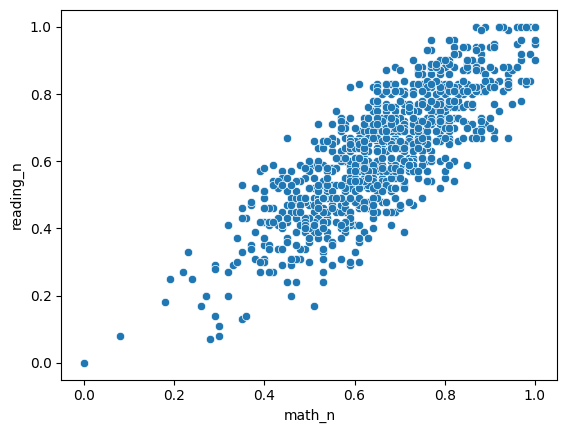

In [19]:
sns.scatterplot(data=new_df, x='math_n', y='reading_n')
plt.show()